## Deteccion de lunares

### Importar librerias

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Cargar imagen

In [3]:
img_lunar = cv2.imread("../0.data/Images/lunares/datasetLunares/dysplasticNevi/train/dysplasticNevi1.jpg")

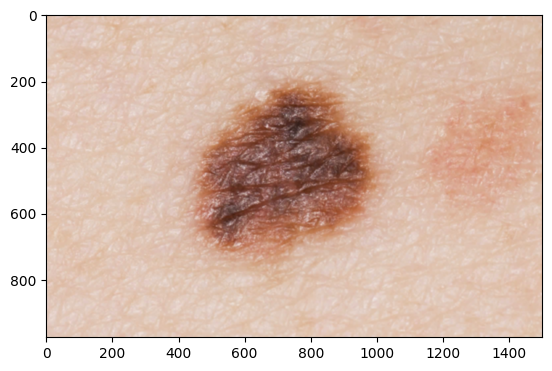

In [18]:
# Cambiar esacio de color BGR a RGB
imgRGB = cv2.cvtColor(img_lunar, cv2.COLOR_BGR2RGB)
# hidden values of dimensions
# plt.xticks([]), plt.yticks([])
# Mostrar imagen
plt.imshow(imgRGB, cmap='gray', interpolation='bicubic')
plt.show()

### Pre procesamiento de imagenes

In [19]:
# pasar la imagen a escala de grises
gray_img = cv2.cvtColor(img_lunar, cv2.COLOR_BGR2GRAY)

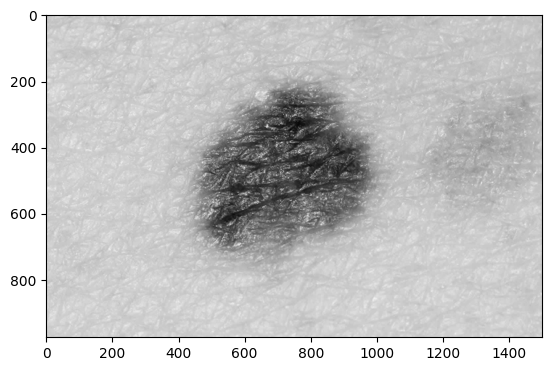

In [20]:
# mostrar resultado
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

In [21]:
# Crear un threshold que permita determinar cuando es lunar o no
threshold, _ = cv2.threshold(gray_img, 0 , 255, cv2.THRESH_OTSU)

In [22]:
# crear una máscara
# como el lunar es mas oscuro que la piel
# nos insteresa todos los valores que estan por debajo del threshold
mask = np.uint8(1*(gray_img<threshold)) # umbral o binarizacion

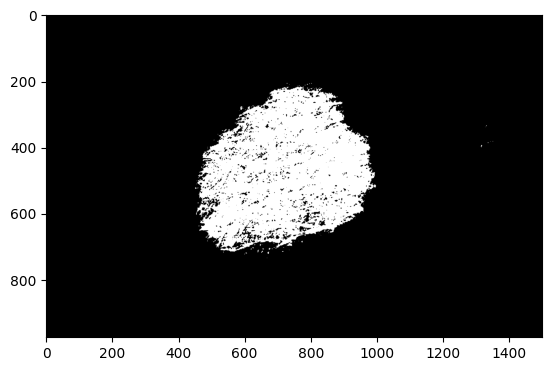

In [23]:
# mostrar resultado
plt.imshow(mask, cmap=plt.get_cmap('gray')) 

In [46]:
# obtener el canal solo del segmento que la mascara delimitó
B = img_lunar[:,:,0]*mask # canal blue como matriz de valores
G = img_lunar[:,:,1]*mask # canal green
R = img_lunar[:,:,2]*mask # canal red

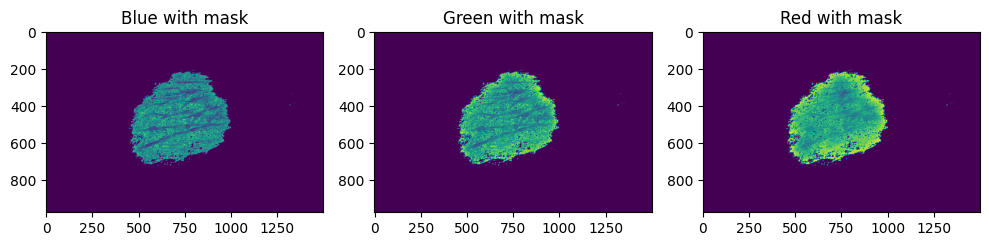

In [38]:
# Crear la figura y los subplots en 3 columnas
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

ax1.imshow(B)
ax1.set_title('Blue with mask')
ax2.imshow(G)
ax2.set_title('Green with mask')
ax3.imshow(R)
ax3.set_title('Red with mask')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [48]:
# obteniendo las caracteristicas de color de 1 sola imagen
# dividimos la sum de la imagen/sum mask para obtener el promedio 
# colocando entre 0 y 1 multiplicando por 255
B = (1/255)*np.sum(img_lunar[:,:,0]*mask)/np.sum(mask) # canal blue como un unico valor promedio
G = (1/255)*np.sum(img_lunar[:,:,1]*mask)/np.sum(mask) # canal green
R = (1/255)*np.sum(img_lunar[:,:,2]*mask)/np.sum(mask) # canal red

### Generación de dataset de característcas

In [50]:
# convirtiendo a funcion para extraer las caracteristicas sobre varias imagenes

def getFeatures(img):
    # pasar la imagen a escala de grises
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Crear un threshold que permita determinar cuando es lunar o no
    threshold, _ = cv2.threshold(gray_img, 0 , 255, cv2.THRESH_OTSU)
    # nos insteresa todos los valores que estan por debajo del threshold
    mask = np.uint8(1*(gray_img<threshold)) # umbral o binarizacion
    B = (1/255)*np.sum(img[:,:,0]*mask)/np.sum(mask) # canal blue como un unico valor promedio
    G = (1/255)*np.sum(img[:,:,1]*mask)/np.sum(mask) # canal green
    R = (1/255)*np.sum(img[:,:,2]*mask)/np.sum(mask) # canal red
    return [B,G,R]

In [51]:
import glob # lireria que ayuda a la lectua de los archivos

In [55]:
# ruta de las carpetas que contienen nuestras imágenes
paths = ["../0.data/Images/lunares/datasetLunares/dysplasticNevi/train/",
         "../0.data/Images/lunares/datasetLunares/spitzNevus/train/"]
# convertir en una tabla
labels = []
features = []
for label, path in enumerate(paths): # el label va a ser como el index, y en path la ruta de c/img
    for filename in glob.glob(path+"*.jpg"): # obtenemos todas las rutas de las imagenes .jpg
        img = cv2.imread(filename)
        #print(filename)
        features.append(getFeatures(img))
        labels.append(label) # index 0: dysplasticNevi,  index 1: spitzNevus


In [59]:
# convertir a array de numpy
features = np.array(features)
labels = np.array(labels)
# en este caso usaremos los labels como -1 y 1
labels = 2*labels - 1 # los q eran 0 ahora son -1 y los de 1 se mantienen

* Con eso concluimos la generación del dataset de características

### Visualizaion del dataset en un espacio de caracteristicas

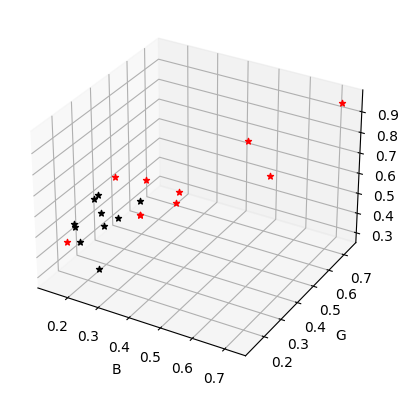

In [60]:
fig=plt.figure()
ax = fig.add_subplot(111, projection="3d") # 111: equivale a grafica en 3d

for i, features_row in enumerate(features):
    if labels[i]==-1:
        ax.scatter(features_row[0],features_row[1],features_row[2], marker="*",c='k')
    else:
        ax.scatter(features_row[0],features_row[1],features_row[2], marker="*",c='r')

ax.set_xlabel("B")
ax.set_ylabel("G")
ax.set_zlabel("R")

plt.show()


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
features_row

array([0.23585821, 0.30261755, 0.69862284])

In [125]:
# Generar datos de ejemplo
#X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X = features
y = labels
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Crear y entrenar el modelo 3 neuronas c1 y c2 7 
model = MLPClassifier(hidden_layer_sizes=(3,7), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.7894736842105263


c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [126]:
# prediccion
path_img = "../0.data/Images/lunares/datasetLunares/dysplasticNevi/train/dysplasticNevi4.jpg"
pred_img = cv2.imread(path_img)
# aplicarle la extraccion de caracteristicas
features_vector = np.array([getFeatures(pred_img)])

In [127]:
model.predict(features_vector)

array([-1])

In [129]:
# prediccion
path_img = "../0.data/Images/lunares/datasetLunares/spitzNevus/train/spitzNevus4.jpg"# cargar imagen
pred_img = cv2.imread(path_img)
# aplicarle la extraccion de caracteristicas
features_vector = np.array([getFeatures(pred_img)])

model.predict(features_vector)

array([1])

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.8421052631578947


In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_train)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 1.0


In [ ]:
# CNTINUAR CON LA CARPETA 5